In [2]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

{'width': 1024, 'height': 768, 'scroll': True}

## The Wealth Gap in the US is Very Real

![think](maxresdefault.jpg)
https://www.forbes.com/sites/timworstall/2013/03/09/the-problem-with-the-wealth-inequality-in-america-video-it-commits-worstalls-fallacy/#1b0004ce7aa9


![actual](actual.jpg)

## Educator's Perspective

* Taking a grass roots approach by investigating the financial literacy rates amongst Americans.  

* **My Hypothesis**: Financial literacy is underserved in our education system.  

* **My Goal**: To show you that educational programs that center on financial literacy are direly needed.

![grassroots](grassroots.jpeg)

## What is Financial Literacy?

Here is the formal definition of [financial literacy](https://www.investopedia.com/terms/f/financial-literacy.asp): 

>Financial literacy is the education and understanding of various financial areas including topics related to managing personal finance, money and investing. This topic focuses on the ability to manage personal finance matters in an efficient manner, and it includes the knowledge of making appropriate decisions about personal finance such as investing, insurance, real estate, paying for college, budgeting, retirement and tax planning.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("./correct_data.csv")

## The Data

- Retrieved from the [National Financial Capability Study](http://www.usfinancialcapability.org/downloads.php)
- From 2015
- Data collection was done by each state across a large sample.

In [5]:

for i in df.columns:
    print(i)

NFCSID
State
CensusDivision
CensusRegion
Gender
AgeGroup
Gender/AgeNet
Ethnicity
HighestLevelEducation
MaritalStatus
LivingArrangements
MaritalStatusVariable
Dependents
HouseholdIncome
USVeteran?
EndOfMilitaryService
RetireFromMilitary?
SpouseUSVeteran?
X3
X4
CurrentWorkStatus
SpouseCurrentWorkStatus
HouseholdRetirementStatus
PartTimeStudent?
TypeSchool
WhoExpertInFinances
SatisfactionLevelCurrentFinances
WillingnessFinancialRisk
SpendingVsIncome
DifficultyLevelPayingBills
EmergencyFunds?
SavingsChildCollegeEducation?
RetirementFundCalculationsAtAll?
RetirementFundCalculationsBeforeRetired?
IncomeDropPastYear?
ConfidenceLevelToEarn2000WithinMonth
ImportantTimePeriodsForBudgeting
Budget?
CreditRating
DegreeOfWorryAboutRetirement
HaveFinancialGoals?
CheckingAccount?
SavingsAccount?
OverdrawOccasionally?
FrequencyOfPayingBillsWithDebitCard
FrequencyPhoneToPay
PensionPlanFromEmployer?
WhoseEmployerForRetirementPlans?
CanYouChooseHowRetirementPlans?
RetirementsAccountNotFromWork?
RegularlyC

In [6]:
df.shape

(27564, 127)

## Working with the Data

1. Define the problem, clearly and succinctly. What I want to prove is: financial literacy is significantly underserved in our education system.
2. Scan the survey to flag columns that are deemed relevant to the problem statement.
3. Compartmentalize flagged columns in ‘buckets’ where each bucket encompasses one of the three main core ideas of financial literacy: **money management, future planning, knowledge of compound interest.**
4. Aggregate over the dataset, looping over each sample to see if bucket conditions apply, and generate a **‘finacial literacy score’** for each sample.
5. Using the aforementioned financial literacy score, generate visualizations in order to explore patterns and discrepancies in the data.

## Financial Literacy Scores Amongst Americans

In [7]:
df['financialliteracyscore'].describe()

count    27564.000000
mean        34.669752
std         17.734525
min         -7.407407
25%         22.222222
50%         33.333333
75%         48.148148
max         81.481481
Name: financialliteracyscore, dtype: float64

In [8]:
%matplotlib inline 
series = df['financialliteracyscore']

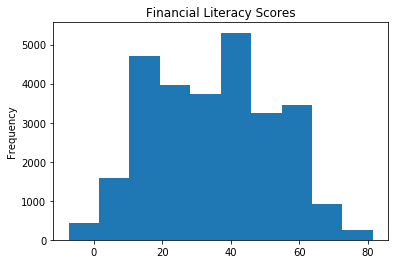

In [9]:
series.plot(kind='hist',title='Financial Literacy Scores')

In [10]:
df['HighestLevelEducation'].value_counts()

College, no degree     7739
Bachelor's             6318
HS diploma             4447
Post Graduate          3747
Associate's            3024
GED or alternative     1698
Did not complete HS     591
Name: HighestLevelEducation, dtype: int64

In [11]:
df_college = df[df['HighestLevelEducation']==('Bachelor\'s' or 'GED or altenative')]
df_post_grad = df[df['HighestLevelEducation']=='Post Graduate']
df_highschool = df[df['HighestLevelEducation']==('HS diploma' or 'College, no degree')]
df_associates = df[df['HighestLevelEducation']=='Associate\'s']


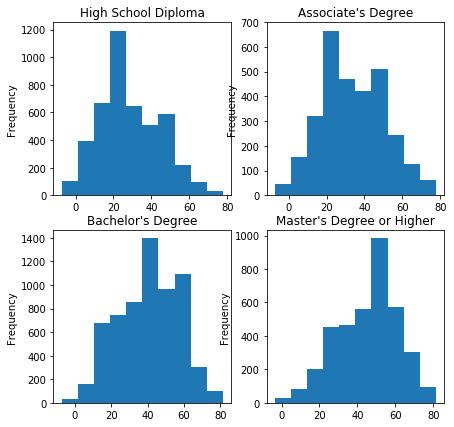

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2,ncols=2)
df_highschool['financialliteracyscore'].plot(kind='hist', title = 'High School Diploma',ax=axes[0,0],figsize=(7,7),)
df_associates['financialliteracyscore'].plot(kind='hist', title = 'Associate\'s Degree',ax=axes[0,1],figsize=(7,7))
df_college['financialliteracyscore'].plot(kind='hist', title = 'Bachelor\'s Degree',ax=axes[1,0])
df_post_grad['financialliteracyscore'].plot(kind='hist', title = 'Master\'s Degree or Higher', ax = axes[1,1])


In [13]:
fin_ed_df = df[df['FinancialEducationOfferedAtSchoolOrWork?']<98]

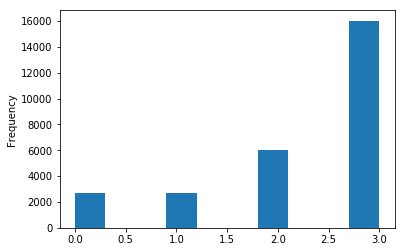

In [14]:
fin_ed_df['FinancialEducationOfferedAtSchoolOrWork?'].plot(kind='hist')
# 0 = I don't know
# 1 = Yes, but did not participate
# 2 = Yes, and I did participate
# 3 = No

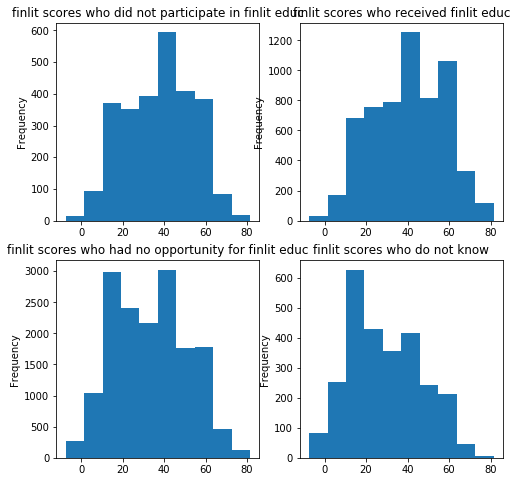

In [15]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fin_ed_df[fin_ed_df['FinancialEducationOfferedAtSchoolOrWork?'] == 1]['financialliteracyscore'].plot(kind='hist',title='finlit scores who did not participate in finlit educ',ax=axes[0,0],figsize=(8,8))
fin_ed_df[fin_ed_df['FinancialEducationOfferedAtSchoolOrWork?'] == 2]['financialliteracyscore'].plot(kind='hist',title='finlit scores who received finlit educ',ax=axes[0,1],figsize=(8,8))
fin_ed_df[fin_ed_df['FinancialEducationOfferedAtSchoolOrWork?'] == 3]['financialliteracyscore'].plot(kind='hist',title='finlit scores who had no opportunity for finlit educ',ax=axes[1,0],figsize=(8,8))
fin_ed_df[fin_ed_df['FinancialEducationOfferedAtSchoolOrWork?'] == 0]['financialliteracyscore'].plot(kind='hist',title='finlit scores who do not know',ax=axes[1,1],figsize=(8,8))

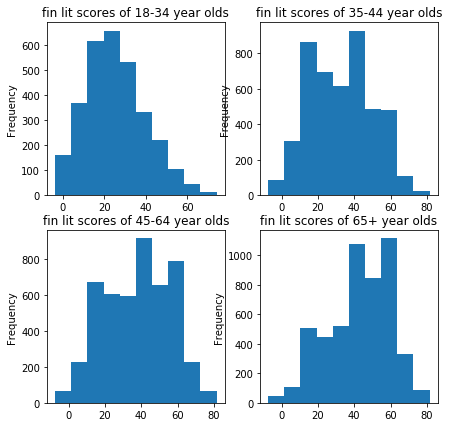

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df[df['AgeGroup']==('18-24' or '25-34')]['financialliteracyscore'].plot(kind='hist',ax=axes[0,0],title='fin lit scores of 18-34 year olds',figsize=(7,7))                                                                      
df[df['AgeGroup']==('35-44')]['financialliteracyscore'].plot(kind='hist',ax=axes[0,1],title='fin lit scores of 35-44 year olds',figsize=(7,7))
df[df['AgeGroup']==('55-64' or '45-54')]['financialliteracyscore'].plot(kind='hist',ax=axes[1,0],title='fin lit scores of 45-64 year olds',figsize=(7,7))
df[df['AgeGroup']==('65+')]['financialliteracyscore'].plot(kind='hist',ax=axes[1,1],title='fin lit scores of 65+ year olds',figsize=(7,7))


In [17]:
df_clean = df[df['DegreeOfWorryAboutRetirement']!=99]

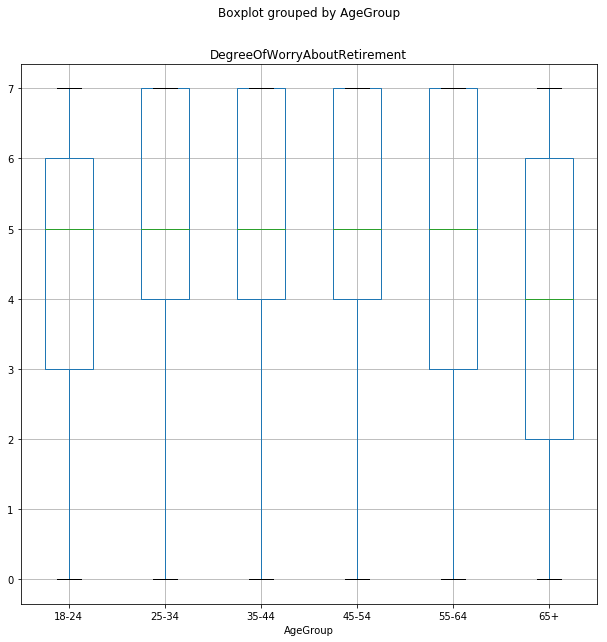

In [18]:
df_clean.boxplot(column='DegreeOfWorryAboutRetirement',by='AgeGroup',figsize=(10,10))

In [19]:
df_18_34 = df[df['AgeGroup']==('18-24' or '25-34')]

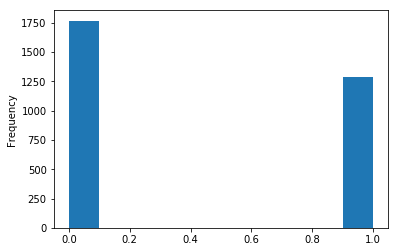

In [20]:
df_18_34['StudentLoans?1=Y'].plot(kind='hist')

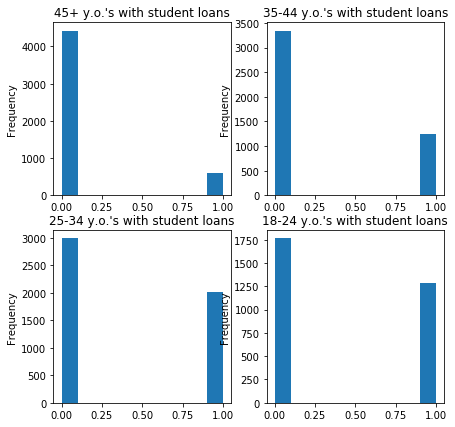

In [21]:

fig, axes = plt.subplots(nrows=2, ncols=2)
df[df['AgeGroup']==('45-54' or ('55-64' or '65+'))]['StudentLoans?1=Y'].plot(kind='hist',ax=axes[0,0],title='45+ y.o.\'s with student loans',figsize=(7,7))
df[df['AgeGroup']==('35-44')]['StudentLoans?1=Y'].plot(kind='hist',ax=axes[0,1],title='35-44 y.o.\'s with student loans',figsize=(7,7))
df[df['AgeGroup']==('25-34')]['StudentLoans?1=Y'].plot(kind='hist',ax=axes[1,0],title='25-34 y.o.\'s with student loans',figsize=(7,7))

df[df['AgeGroup']==('18-24')]['StudentLoans?1=Y'].plot(kind='hist',ax=axes[1,1],title='18-24 y.o.\'s with student loans',figsize=(7,7))                                                                      


![grassroots](compound-interest-graph.jpg)
https://www.moneywehave.com/compound-interest-is-my-bff/compound-interest-graph/

# What Educators Can Do Now
![investopedia](investopedia.png)

# Current Educational Programs Are Not Enough

* Student loans will continually grow 
![studentloans](Graph1.jpg)
https://www.thecollegefix.com/one-graph-shows-higher-ed-bubble-may-close-bursting/